In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os

os.listdir('/content/drive/My Drive/finance')


['TW0050.csv',
 'TW0050_lebal.npy',
 'TW0050.npy',
 'stock.h5',
 'TW0050_ma.csv',
 'original',
 'TW50_FP_ALL_data.npy',
 'TW50_FP_ALL_labe.npy',
 'oSc_andH',
 'oBc_andH',
 'oBc_andQ',
 'oQc_andH',
 'oQc_andQ']

In [39]:
import requests
import time
import numpy as np
import os
import math
import pandas as pd


In [40]:
temp = ""
with open("/content/drive/My Drive/finance/oQc_andQ/1.csv","r") as f:
  temp = str(f.read()).split("|")

print(len(temp))
temp[1].split("..")

10001


['7.12925,40.32653,0.02415,0.03639,-0.00034,0.02415,-0.05327,0.02458,0.00571,-0.01315,0.02354,-0.00548,-0.03449,0.04677,-0.0069,-0.06058,241750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0',
 '6.97077,39.38525,-0.00365,0.00598,-0.01362,-0.00365,-0.07897,0.00667,-0.01468,-0.03603,0.00199,-0.02371,-0.04941,0.02266,-0.03012,-0.0829,154900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0',
 '7.03333,39.56667,0.0,0.00333,-0.00967,0.0,-0.07559,0.01431,-0.00767,-0.02964,0.00892,-0.0163,-0.04152,0.02641,-0.02657,-0.07954,136830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [41]:
path_dir = "/content/drive/My Drive/finance"
path_label = [x for x in os.listdir(path_dir) if "_and" in x]
path_label

['oSc_andH', 'oBc_andH', 'oBc_andQ', 'oQc_andH', 'oQc_andQ']

In [42]:
dct=dict()
for x in path_label:
  temp = [y for y in os.listdir(path_dir+ "/"+x) ]
  dct[x]=len(temp)
dct

{'oBc_andH': 25, 'oBc_andQ': 18, 'oQc_andH': 9, 'oQc_andQ': 5, 'oSc_andH': 34}

In [43]:
def read_sotck_data(path):
  string_list = None
  with open( path,"r") as f:
    string_list = str(f.read()).split("|")

  one_file_list =list()

  for x in string_list[:-1]:
    one_case_str = x.split("..")
    one_cade_lst = list()
    for y in one_case_str[:20]:
        one_cade_lst.append( np.fromstring(y, dtype=float, sep=','))

    one_file_list.append(np.array(one_cade_lst))

  return np.array(one_file_list)


   

In [44]:
temp = ""
all_data = None
all_label = list()
isfirst = True

for x in path_label:
  # for i in range(1,5):
  if isfirst:
    all_data = read_sotck_data(f"{path_dir}/{x}/1.csv")
    isfirst =False
  else:
    all_data = np.append(all_data,read_sotck_data(f"{path_dir}/{x}/1.csv"),axis=0 )
  all_label += [path_label.index(x)] *10000

all_label =np.array([np.eye(5)[x] for x in all_label])
print(all_label.shape)
all_data.shape
X =  all_data.reshape(50000,1540)


(50000, 5)


In [45]:
X =  all_data.reshape(50000,1540)
y= all_label
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X )

from sklearn.utils import shuffle
X, X_sparse, y = shuffle(X, X_sparse, y, random_state=0)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import matplotlib.pyplot as plt

# X =  all_data.reshape(50000,1540)
# y= all_label
X_train, X_ver, y_train, y_ver = train_test_split(X,y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=150,max_depth=42)

model = RandomForestClassifier(n_estimators = 100, n_jobs = -1,\
                              random_state =42,max_features = "log2")


model.fit(X_train,y_train)
y_pred = model.predict(X_ver)
accuracy = accuracy_score(y_ver, y_pred)  
print(f"RandomForest 準確度:{accuracy}" )   



RandomForest 準確度:0.3348


(10000,)
(10000,)


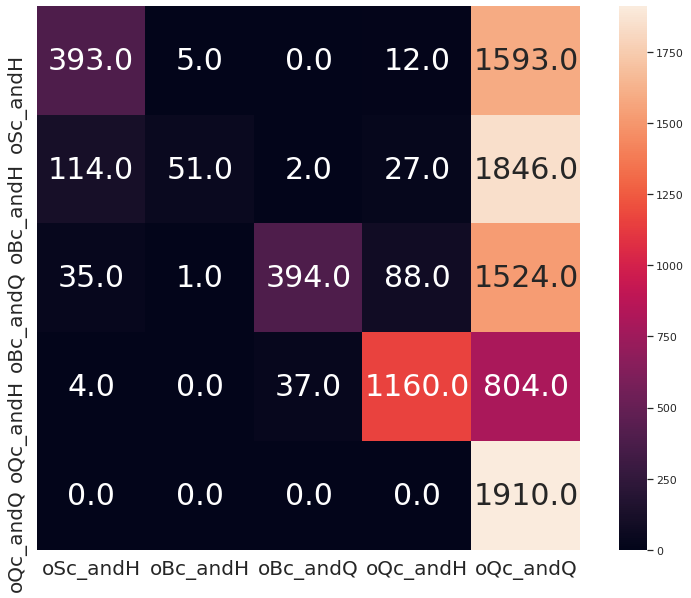

In [46]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns; 
from sklearn.metrics import confusion_matrix 
sns.set()

y_true =np.argmax(y_ver, axis=1)

list_sigle =path_label

y_pred =np.argmax(y_pred, axis=1)

fig, ax= plt.subplots(figsize = (14, 10),)
print(y_true.shape)
print(y_pred.shape)
y_true =[list_sigle[x] for x in y_true ]
y_pred =[list_sigle[x] for x in y_pred ]
C=confusion_matrix(y_true, y_pred)

ax.set_xticklabels(list_sigle,rotation=0,fontsize=20)
ax.set_yticklabels(list_sigle,rotation=0,fontsize=20)

sns.heatmap(C,annot=True, annot_kws={"size": 30},square=True ,fmt ='.1f',xticklabels =list_sigle, yticklabels =list_sigle,ax=ax)

